In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Runs on Vanderbilt server

In [2]:
df_vu = pd.DataFrame()
df_vu["Dataset"] = ['OASIS1', 'OASIS2', 'OASIS3', 'DRD1', 'DRD2', 'DRD3']
df_vu["Walltime"] = [10437, 11441, 11343, 13685, 13725, 13522]
df_vu["Preprocess"] = [250.84, 784.82, 726.87, 2744.02,  2753.7, 2562.64]
df_vu["Segmentation"] = [7817.11, 7762.89, 7768.6, 7801, 7792.09, 7776.73]
df_vu["Postprocess"] = [2289, 2818.24, 2739.2, 3055.12, 3070.81,  3117.8]
df_vu["Input_size"] = [24, 11264, 10492, 60716, 51488, 49468]
df_vu["Server"] = ["VU" for _ in range(6)]
df_vu

,Dataset,Walltime,Preprocess,Segmentation,Postprocess,Input_size,Server
0,OASIS1,10437,250.84,7817.11,2289.00,24,VU
1,OASIS2,11441,784.82,7762.89,2818.24,11264,VU
2,OASIS3,11343,726.87,7768.60,2739.20,10492,VU
3,DRD1,13685,2744.02,7801.00,3055.12,60716,VU
4,DRD2,13725,2753.70,7792.09,3070.81,51488,VU
5,DRD3,13522,2562.64,7776.73,3117.80,49468,VU


In [3]:
df_vu["Walltime"] = df_vu["Walltime"] / 60
df_vu["Segmentation"] = df_vu["Segmentation"] / 60
df_vu["Preprocess"] = df_vu["Preprocess"] / 60
df_vu["Postprocess"] = df_vu["Postprocess"] / 60
df_vu["Input_size"] = df_vu["Input_size"] / 1024

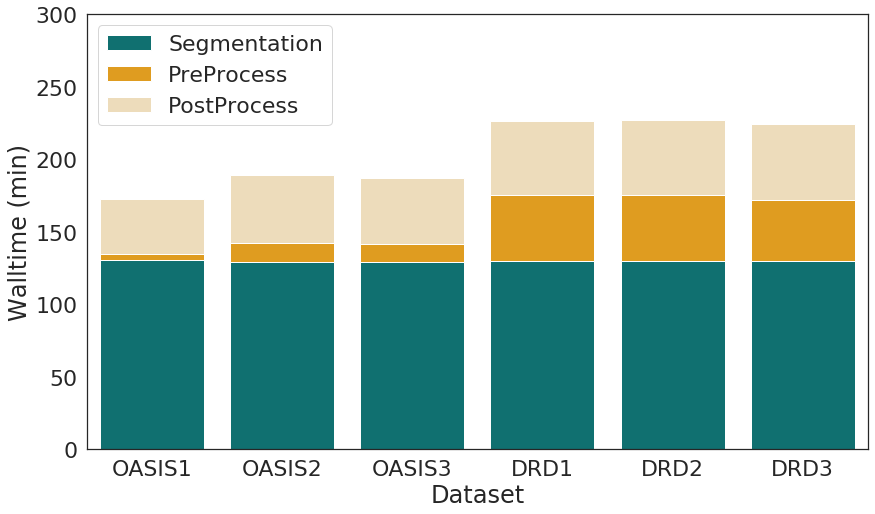

In [5]:
fig, ax = plt.subplots(figsize=(14,8))
sns.set(font_scale=2)
sns.set_style("white")

ax = sns.barplot(y="Segmentation", x="Dataset", color="teal", label="Segmentation",
                 data=df_vu)
ax = sns.barplot(y="Preprocess", bottom=df_vu["Segmentation"].values, x="Dataset",
                 color="orange", label="PreProcess", data=df_vu)
ax = sns.barplot(y="Postprocess", bottom=df_vu["Preprocess"].values + df_vu["Segmentation"].values, x="Dataset",
                 color="wheat", label="PostProcess", data=df_vu)



plt.legend(loc='upper left')
#plt.grid(True)
ax.set_ylim(0, 300)
ax.set_ylabel('Walltime (min)')
ax.set_xlabel('Dataset')
#plt.savefig("walltime_vu_server.png")
plt.show()

# Runs on INRIA server

In [6]:
df_fr = pd.DataFrame()
df_fr["Dataset"] = ['OASIS1', 'OASIS2', 'OASIS3', 'DRD1', 'DRD2', 'DRD3']
df_fr["Preprocess"] = [88, 134, 258, 1668, 1600, 2372]
df_fr["Segmentation"] = [3094, 3042, 3084, 3178, 3080, 3270]
df_fr["Postprocess"] = [474, 386, 778, 2730, 1918, 2652]
df_fr["Server"] = ["Inria" for _ in range(6)]

df_fr

,Dataset,Preprocess,Segmentation,Postprocess,Server
0,OASIS1,88,3094,474,Inria
1,OASIS2,134,3042,386,Inria
2,OASIS3,258,3084,778,Inria
3,DRD1,1668,3178,2730,Inria
4,DRD2,1600,3080,1918,Inria
5,DRD3,2372,3270,2652,Inria


In [7]:
df_fr["Segmentation"] = df_fr["Segmentation"] / 60
df_fr["Preprocess"] = df_fr["Preprocess"] / 60
df_fr["Postprocess"] = df_fr["Postprocess"] / 60

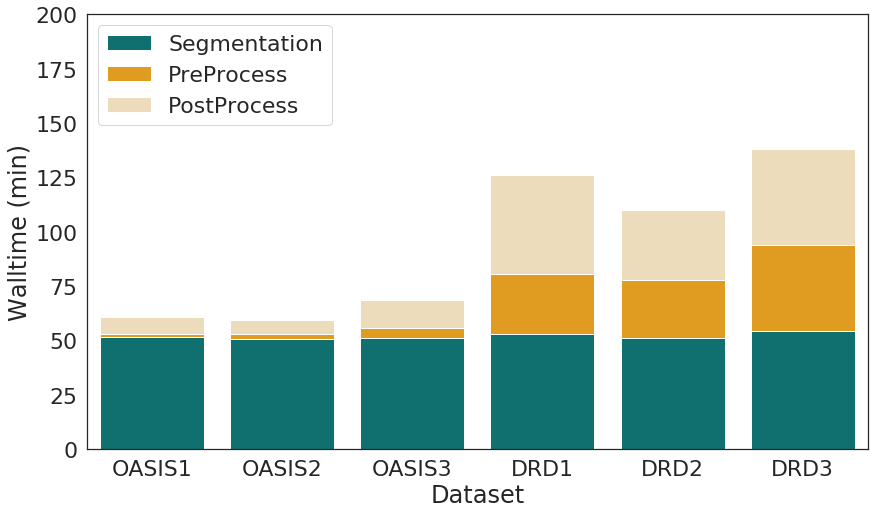

In [8]:
fig, ax = plt.subplots(figsize=(14,8))
sns.set(font_scale=2)
sns.set_style("white")

ax = sns.barplot(y="Segmentation", x="Dataset", color="teal", label="Segmentation",
                 data=df_fr)
ax = sns.barplot(y="Preprocess", bottom=df_fr["Segmentation"].values, x="Dataset",
                 color="orange", label="PreProcess", data=df_fr)
ax = sns.barplot(y="Postprocess", bottom=df_fr["Preprocess"].values + df_fr["Segmentation"].values, x="Dataset",
                 color="wheat", label="PostProcess", data=df_fr)



plt.legend(loc='upper left')
#plt.grid(True)
ax.set_ylim(0, 200)
ax.set_ylabel('Walltime (min)')
ax.set_xlabel('Dataset')
#plt.savefig("walltime_inria_server.png")
plt.show()

# Plot the results from both servers in one figure

In [11]:
frames = [df_vu, df_fr]
df = pd.concat(frames)
df["Preprocess"] += df["Segmentation"]
df["Postprocess"] += df["Preprocess"]
df.head()

,Dataset,Walltime,Preprocess,Segmentation,Postprocess,Input_size,Server
0,OASIS1,173.950000,134.465833,130.285167,172.615833,0.023438,VU
1,OASIS2,190.683333,142.461833,129.381500,189.432500,11.000000,VU
2,OASIS3,189.050000,141.591167,129.476667,187.244500,10.246094,VU
3,DRD1,228.083333,175.750333,130.016667,226.669000,59.292969,VU
4,DRD2,228.750000,175.763167,129.868167,226.943333,50.281250,VU


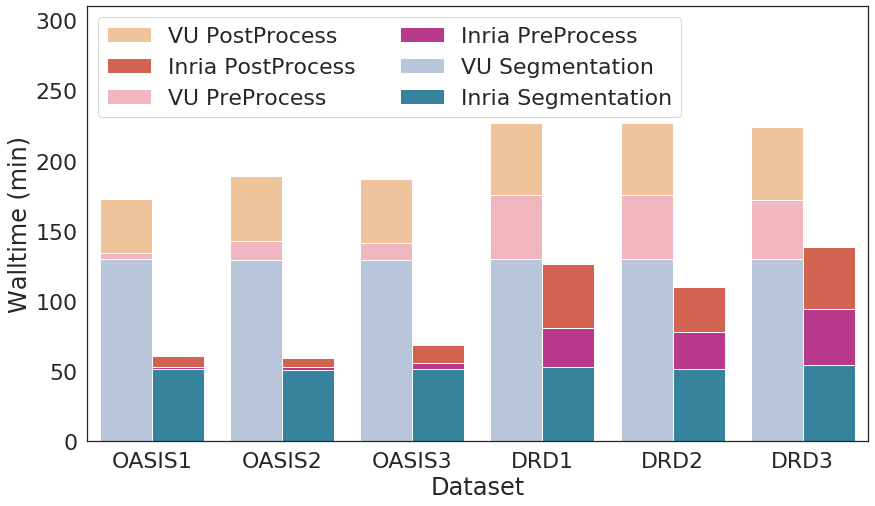

In [118]:
fig, ax = plt.subplots(figsize=(14,8))
sns.set(font_scale=2)
sns.set_style("white")

purple_pal = sns.color_palette("ch:2,r=.25,l=.7,dark=.8")

ax = sns.barplot(y="Postprocess", x="Dataset",
                 palette = 'OrRd', data=df, hue="Server")

sns.barplot(y="Preprocess", x="Dataset",
            palette = "RdPu", data=df, hue="Server")

sns.barplot(y="Segmentation", x="Dataset", palette = "PuBuGn",
            data=df, hue="Server")

labels=["VU PostProcess","Inria PostProcess", "VU PreProcess",
        "Inria PreProcess", "VU Segmentation", "Inria Segmentation"]
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, frameon=True, loc='upper left', ncol=2)

ax.set_ylim(0, 310)
plt.grid(False)
ax.set_ylabel('Walltime (min)')
ax.set_xlabel('Dataset')
#plt.savefig("walltime_all_server.png")
plt.show()

# Compare the results on the 2 servers

In [146]:
datasets = df_vu['Dataset'].unique()
slowdown = pd.DataFrame()
datasets

array(['OASIS1', 'OASIS2', 'OASIS3', 'DRD1', 'DRD2', 'DRD3'], dtype=object)

In [147]:
slowdown['Slowdown'] = df_vu["Preprocess"] / df_fr["Preprocess"]
slowdown['Dataset'] = df_vu['Dataset']
slowdown['Stage'] = ['Preprocess' for i in range(len(df_vu))]
for d in datasets:
    vu = df_vu[df_vu.Dataset==d]["Preprocess"].values[0]
    inria = df_fr[df_vu.Dataset==d]["Preprocess"].values[0]
    print(vu/inria)

2.8504545454545456
5.856865671641791
2.817325581395349
1.6450959232613909
1.7210624999999997
1.080370994940978


In [150]:
temp = pd.DataFrame()
temp['Slowdown'] = df_vu["Postprocess"] / df_fr["Postprocess"]
temp['Dataset'] = df_vu['Dataset']
temp['Stage'] = ['Postprocess' for i in range(len(df_vu))]
slowdown = pd.concat([slowdown, temp])
for d in datasets:
    vu = df_vu[df_vu.Dataset==d]["Postprocess"].values[0]
    inria = df_fr[df_vu.Dataset==d]["Postprocess"].values[0]
    print(vu/inria)

4.829113924050633
7.301139896373057
3.5208226221079686
1.119091575091575
1.6010479666319082
1.1756410256410257


In [151]:
temp = pd.DataFrame()
temp['Slowdown'] = df_vu["Segmentation"] / df_fr["Segmentation"]
temp['Dataset'] = df_vu['Dataset']
temp['Stage'] = ['Segmentation' for i in range(len(df_vu))]
slowdown = pd.concat([slowdown, temp])
for d in datasets:
    print(df_vu[df_vu.Dataset==d]["Segmentation"].values[0] / df_fr[df_vu.Dataset==d]["Segmentation"].values[0])

2.5265384615384616
2.5519033530571993
2.519001297016861
2.454688483322845
2.5298993506493503
2.378204892966361


In [153]:
slowdown.head()

,Slowdown,Dataset,Stage
0,2.850455,OASIS1,Preprocess
1,5.856866,OASIS2,Preprocess
2,2.817326,OASIS3,Preprocess
3,1.645096,DRD1,Preprocess
4,1.721062,DRD2,Preprocess


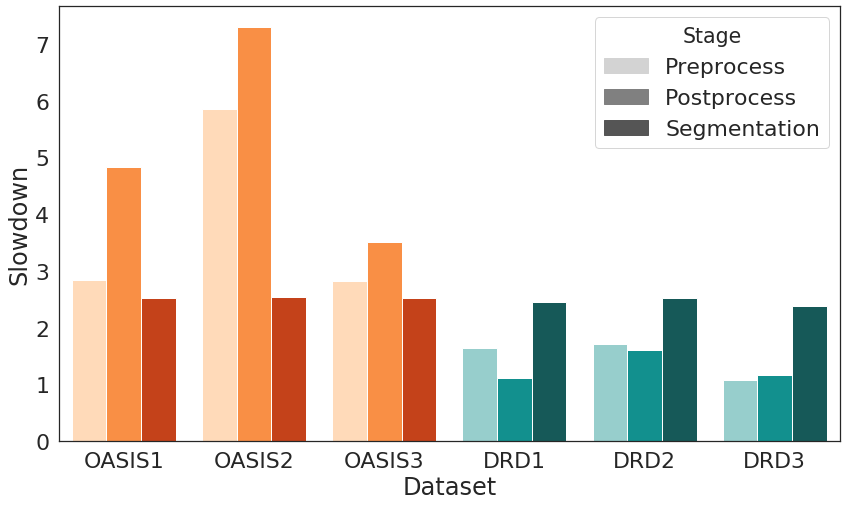

In [184]:
fig, ax = plt.subplots(figsize=(14,8))
sns.set(font_scale=2)
sns.set_style("white")

colors = ['peachpuff', 'peachpuff', 'peachpuff',
          '#97cecc', '#97cecc', '#97cecc',
          '#f98f45', '#f98f45', '#f98f45',
          '#12908e', '#12908e', '#12908e',
          '#c4421a', '#c4421a', '#c4421a',
          '#165958', '#165958', '#165958']
bar = sns.barplot(y="Slowdown", x="Dataset", #palette="Blues",
                 data=slowdown, hue="Stage")#, palette=colors)

# Loop over the bars
for i,thisbar in enumerate(bar.patches):
    # Set a different hatch for each bar
    thisbar.set_color(colors[i])
    thisbar.set_edgecolor("white")

leg = ax.get_legend()
leg.legendHandles[0].set_color('lightgray')
leg.legendHandles[1].set_color('gray')
leg.legendHandles[2].set_color('#555555')
#plt.grid(True)

ax.set_ylabel('Slowdown')
ax.set_xlabel('Dataset')
plt.savefig("walltime_all_server.png")
plt.show()

# Bandwidth

In [191]:
df = pd.DataFrame(columns=['Size', "Ctime", "Rtime", "WBW", "RBW"])
inf = open('bandwidth', 'r')
i=0
for line in inf:
    line = line.split("\n")[0].split("\t")
    try:
        size = float(line[0])
    except:
        continue
    df.loc[i] = [float(i) for i in line]
    i+=1
df

,Size,Ctime,Rtime,WBW,RBW
0,0.30,4.470,2.1390,68.724832,143.618513
1,0.55,6.699,2.9030,84.072250,194.006200
2,1.27,11.570,4.8310,112.401037,269.194784
3,3.14,19.395,7.8670,165.782934,165.782934
4,4.66,27.157,10.4110,175.713076,458.345980
5,6.31,34.820,13.2016,185.566916,489.443704
6,10.21,53.684,19.3990,194.751509,538.947368
7,11.50,58.660,20.9400,200.750085,562.368672
8,18.94,95.607,34.6740,202.857113,559.340140
9,29.27,144.965,52.5890,206.756665,569.938200


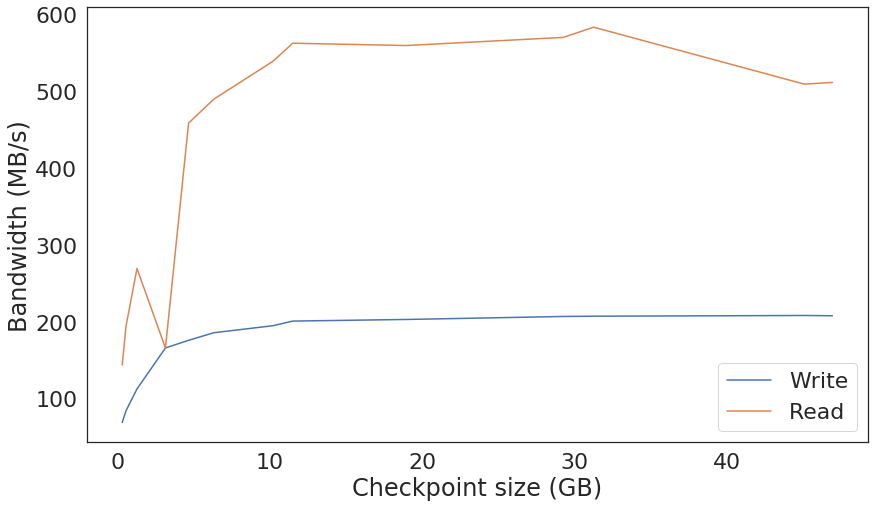

In [194]:
fig, ax = plt.subplots(figsize=(14,8))
sns.set(font_scale=2)
sns.set_style("white")

ax = sns.lineplot(x="Size", y="WBW", label='Write', data=df)
ax = sns.lineplot(x="Size", y="RBW", label='Read', data=df)

ax.set_ylabel('Bandwidth (MB/s)')
ax.set_xlabel('Checkpoint size (GB)')
#plt.savefig("walltime_all_server.png")
plt.show()